In [65]:
import mediapipe as mp
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [67]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils

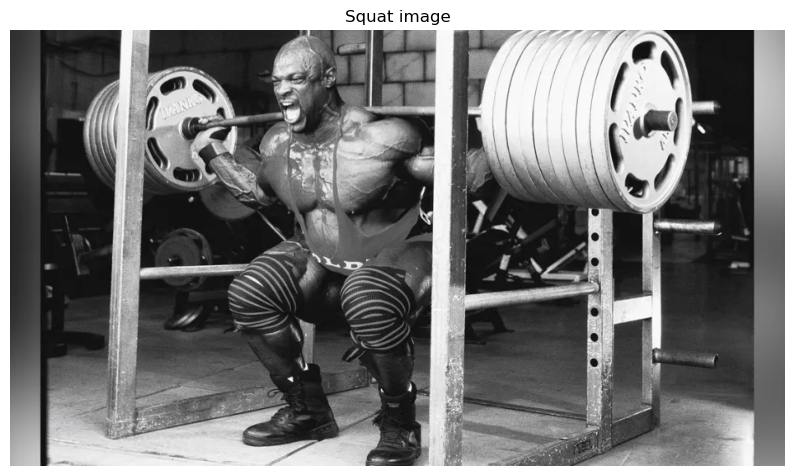

In [87]:
sample_img = cv2.imread("D:/Projects/SquatDetection/SampleImgs/RonnieColeman.jpg")
plt.figure(figsize=[10,10])
plt.title("Squat image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [89]:
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

if results.pose_landmarks:
    for i in range(33):
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i)]}')

NOSE:
x: 0.3570435345172882
y: 0.15455886721611023
z: -0.2406567633152008
visibility: 0.9993185997009277

LEFT_EYE_INNER:
x: 0.3660959005355835
y: 0.1254001259803772
z: -0.23518525063991547
visibility: 0.9989058971405029

LEFT_EYE:
x: 0.37207841873168945
y: 0.1249862015247345
z: -0.23544669151306152
visibility: 0.9987956285476685

LEFT_EYE_OUTER:
x: 0.3775642514228821
y: 0.12480225414037704
z: -0.23542074859142303
visibility: 0.99883633852005

RIGHT_EYE_INNER:
x: 0.35496971011161804
y: 0.12738633155822754
z: -0.21655386686325073
visibility: 0.9993226528167725

RIGHT_EYE:
x: 0.3527364134788513
y: 0.127829909324646
z: -0.2168966829776764
visibility: 0.9994848966598511

RIGHT_EYE_OUTER:
x: 0.35059553384780884
y: 0.1282438337802887
z: -0.21719056367874146
visibility: 0.9995311498641968

LEFT_EAR:
x: 0.3950396478176117
y: 0.13000482320785522
z: -0.1666434109210968
visibility: 0.9994127750396729

RIGHT_EAR:
x: 0.3632631003856659
y: 0.13422322273254395
z: -0.07903342694044113
visibility: 0.99

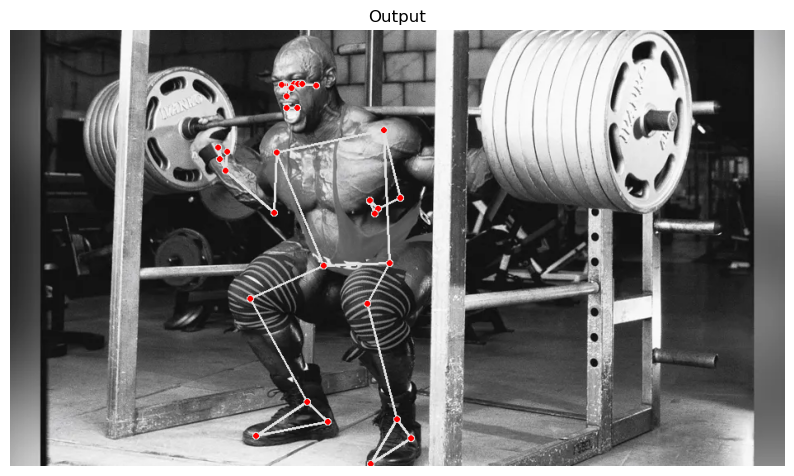

In [91]:
img_copy = sample_img.copy()
if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    fig = plt.figure(figsize=[10,10])
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

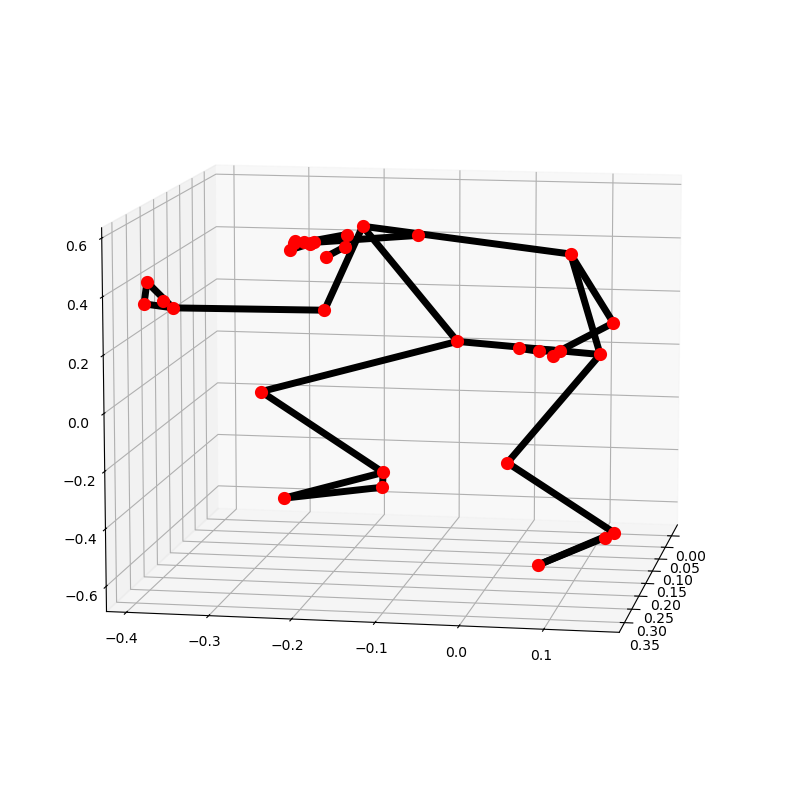

In [93]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [95]:

import math

def calculatingangle(landmark1, landmark2, landmark3):

    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    a1 = math.degrees(math.atan2(y1 - y2, x1 - x2))
    a2 = math.degrees(math.atan2(y3 - y2, x3 - x2))


    if a1 < 0:
        a1 += 360
    if a2 < 0:
        a2 += 360

    angle = abs(a1 - a2)
        
    return angle

    if angle > 180:
        angle = 360 - angle


In [143]:
def classify_pose(image):
    mp_pose = mp.solutions.pose
    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.7) as pose:
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(rgb_image)

        if not results.pose_landmarks:
            return "None Detected", image

        landmarks = results.pose_landmarks.landmark

        right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, 
                     landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y, 
                     landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].z]

        right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, 
                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y, 
                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].z]

        right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x, 
                       landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y, 
                       landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].z]

        knee_angle = calculatingangle(right_hip, right_knee, right_ankle)

        if knee_angle > 160:
            pose_label = "Standing"
        else:
            pose_label = "Squatting"

        
        mp_draw = mp.solutions.drawing_utils
        
        cv2.putText(image, pose_label, (40, 60), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 4)

        return pose_label, image

image = cv2.imread("D:/Projects/SquatDetection/SampleImgs/WomanStanding.jpg")

pose_status, result_image = classify_pose(image)
cv2.imshow("Pose", result_image)
cv2.waitKey(0)  
cv2.destroyAllWindows()

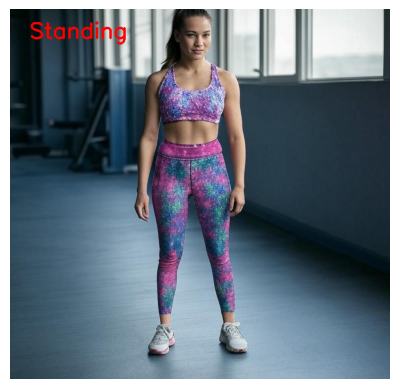

In [145]:
import matplotlib.pyplot as plt

pose_status, result_image = classify_pose(image)

result_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

plt.imshow(result_rgb)
plt.axis('off')
plt.show()

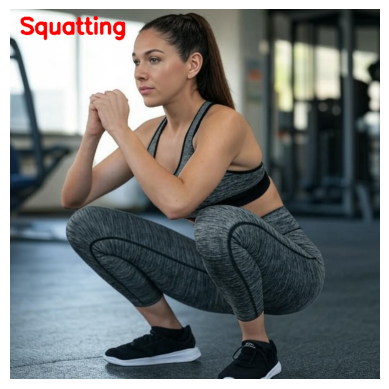

In [149]:
def classify_pose(image):
    mp_pose = mp.solutions.pose
    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.7) as pose:
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(rgb_image)

        if not results.pose_landmarks:
            return "None Detected", image

        landmarks = results.pose_landmarks.landmark

        right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, 
                     landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y, 
                     landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].z]

        right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, 
                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y, 
                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].z]

        right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x, 
                       landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y, 
                       landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].z]

        knee_angle = calculatingangle(right_hip, right_knee, right_ankle)

        if knee_angle > 160:
            pose_label = "Standing"
        else:
            pose_label = "Squatting"

        
        mp_draw = mp.solutions.drawing_utils
        
        cv2.putText(image, pose_label, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 5)

        return pose_label, image

image = cv2.imread("D:/Projects/SquatDetection/SampleImgs/WomanSquat.jpg")

pose_status, result_image = classify_pose(image)
cv2.imshow("Pose", result_image)
cv2.waitKey(0)  
cv2.destroyAllWindows()

import matplotlib.pyplot as plt

pose_status, result_image = classify_pose(image)

result_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

plt.imshow(result_rgb)
plt.axis('off')
plt.show()